In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 6.5MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 6.3MB/s eta 0:00:01                | 1.8MB 6.3MB/s eta 0:00:01��██████████         | 4.0MB 6.3MB/s eta 0:00:01     |███████████████████████████████ | 5.3MB 6.3MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              co

In [2]:
# web scrapping to acquire required communities and population data of Dubai which will be used for analysis later

source = requests.get('https://www.citypopulation.de/en/uae/dubai/admin/').text
soup = BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
table = str(soup.table)
display_html(table,raw=True)

<title>UAE: Division of Dubai (Sectors and Communities) - Population Statistics, Charts and Map</title>


Name,Native,Status,PopulationEstimate2010-12-31,PopulationEstimate2015-12-31,PopulationEstimate2018-12-31,
Al-Qiṭā 1 [Sector 1],القطاع 1,Sector,"378,324","464,307","460,663",→
Abū Haīl,ابو هيل,Community,"25,120","32,753","16,905",→
Aḍ-Ḍaghāyah [Al Dhagaya],الضغاية,Community,"16,461","19,690","15,453",→
Al-Barāḥah,البراحة,Community,"18,246","22,318","24,373",→
Al-Buṭīn [Al Buteen],البطين,Community,"4,421","5,801","2,766",→
Al-Khabīṣī,الخبيصي,Community,"1,687","2,144","1,952",→
Al-Kūrnīsh [Al Corniche],الكورنيش,Community,"1,135","1,489","1,655",→
Al-Mamzar,الممزر,Community,"4,946","13,483","14,178",→
Al-Murar,المرر,Community,"32,409","39,020","38,294",→
Al-Murqabāt,المرقبات,Community,"47,601","56,522","68,717",→


In [3]:
# storing the data in the dataframe

df_new = pd.read_html(table)
df_dubai=df_new[0]
df_dubai.head()

,Name,Native,Status,PopulationEstimate2010-12-31,PopulationEstimate2015-12-31,PopulationEstimate2018-12-31,Unnamed: 6
0,Al-Qiṭā 1 [Sector 1],القطاع 1,Sector,378324,464307,460663,→
1,Abū Haīl,ابو هيل,Community,25120,32753,16905,→
2,Aḍ-Ḍaghāyah [Al Dhagaya],الضغاية,Community,16461,19690,15453,→
3,Al-Barāḥah,البراحة,Community,18246,22318,24373,→
4,Al-Buṭīn [Al Buteen],البطين,Community,4421,5801,2766,→


In [4]:
#Sector is total population of all communities in that sector, and Emirate is the total population of all sectors in the Emirate; 
# we are not interested in these, rather individual communities' population

df_dubai.drop(pd.Index(np.where(df_dubai['Status'].isin(['Sector','Emirate']))[0]), inplace = True)

df_dubai.head()

,Name,Native,Status,PopulationEstimate2010-12-31,PopulationEstimate2015-12-31,PopulationEstimate2018-12-31,Unnamed: 6
1,Abū Haīl,ابو هيل,Community,25120,32753,16905,→
2,Aḍ-Ḍaghāyah [Al Dhagaya],الضغاية,Community,16461,19690,15453,→
3,Al-Barāḥah,البراحة,Community,18246,22318,24373,→
4,Al-Buṭīn [Al Buteen],البطين,Community,4421,5801,2766,→
5,Al-Khabīṣī,الخبيصي,Community,1687,2144,1952,→


In [5]:
# Drop unnecessary columns

df_dubai.drop(['Native' , 'PopulationEstimate2010-12-31', 'PopulationEstimate2015-12-31', 'Unnamed: 6'], axis = 1, inplace = True)

# change the name of column

df_dubai.rename(columns= {'PopulationEstimate2018-12-31' : 'Population (2018)'}, inplace = True)
df_dubai.head()

,Name,Status,Population (2018)
1,Abū Haīl,Community,16905
2,Aḍ-Ḍaghāyah [Al Dhagaya],Community,15453
3,Al-Barāḥah,Community,24373
4,Al-Buṭīn [Al Buteen],Community,2766
5,Al-Khabīṣī,Community,1952


In [6]:
# sort w.r.t population

 df_temp = df_dubai.sort_values('Population (2018)',ascending=False)

In [7]:
# resetting the index

df_temp_reset_index = df_temp.reset_index(drop=True)

In [8]:
# Let's create a new dataframe with top 24 communities in Dubai where we would perform our analysis

df_dubai_top_24 = df_temp_reset_index.iloc[0:24]
df_dubai_top_24.head(24)

,Name,Status,Population (2018)
0,Muḥaīṣanah 2,Community,197838
1,Al-Qūz aṣ-Ṣinā'iyah 2 [Al Quoz Industrial Area...,Community,158543
2,Jabal 'Alī aṣ-Ṣinā'iyah 1 [Jabal Ali Industria...,Community,129024
3,Warsān 1 [Warisan 1],Community,97159
4,Hūr al-'Anz,Community,81741
5,Al-Karāmah,Community,70558
6,Jabal 'Alī 1 [Jebal Ali First],Community,69115
7,Majm' Dubayy Lil'āstathmār 1 [Dubai Investment...,Community,69000
8,Al-Murqabāt,Community,68717
9,Mirdif,Community,60288


In [11]:
# export dataframe as csv

df_dubai_top_24.to_csv(r'C:\Users\z003kk7v\Desktop\Export_dataframe.csv', index = False)

In [9]:
# import csv file with coordinates (latitude and longitude) for top 25 population wise communities in Dubai

df_coordinates = pd.read_csv('dubai_top_25_coordinates_with_english_names.csv')

In [10]:
df_coordinates.head()

,Name,Community Name,Latitude,Longitude
0,Muḥaīṣanah 2,Muhaisnah,25.246400,55.418470
1,Al-Qūz aṣ-Ṣinā'iyah 2 [Al Quoz Industrial Area...,Al Quoz,25.130830,55.232730
2,Jabal 'Alī aṣ-Ṣinā'iyah 1 [Jabal Ali Industria...,Jabel Ali Industrial,25.001900,55.126500
3,Warsān 1 [Warisan 1],Warsan,25.162687,55.422592
4,Hūr al-'Anz,Hor Al Anz,25.276680,55.335560


In [11]:
# merge the two dataframes to get coordinates of the communities

df_merged_dubai = pd.merge(df_dubai_top_24, df_coordinates, on = 'Name')

df_merged_dubai.head(24)

,Name,Status,Population (2018),Community Name,Latitude,Longitude
0,Muḥaīṣanah 2,Community,197838,Muhaisnah,25.246400,55.418470
1,Al-Qūz aṣ-Ṣinā'iyah 2 [Al Quoz Industrial Area...,Community,158543,Al Quoz,25.130830,55.232730
2,Jabal 'Alī aṣ-Ṣinā'iyah 1 [Jabal Ali Industria...,Community,129024,Jabel Ali Industrial,25.001900,55.126500
3,Warsān 1 [Warisan 1],Community,97159,Warsan,25.162687,55.422592
4,Hūr al-'Anz,Community,81741,Hor Al Anz,25.276680,55.335560
5,Al-Karāmah,Community,70558,Al Karama,25.248900,55.306100
6,Jabal 'Alī 1 [Jebal Ali First],Community,69115,Jabel Ali First,25.011260,55.060116
7,Majm' Dubayy Lil'āstathmār 1 [Dubai Investment...,Community,69000,Dubai Investment Park 1,24.983400,55.154100
8,Al-Murqabāt,Community,68717,Al Muraqqabat,25.268040,55.324920
9,Mirdif,Community,60288,Mirdif,25.219600,55.419500


In [12]:
# name column is redundant in the new dataframe, hence we need to get rid of that. Also Status column is not required

df_merged_dubai.drop(['Name' , 'Status'], axis = 1, inplace = True)
df_merged_dubai.head()

,Population (2018),Community Name,Latitude,Longitude
0,197838,Muhaisnah,25.246400,55.418470
1,158543,Al Quoz,25.130830,55.232730
2,129024,Jabel Ali Industrial,25.001900,55.126500
3,97159,Warsan,25.162687,55.422592
4,81741,Hor Al Anz,25.276680,55.335560


In [13]:
# rearranging the columns positions

column_names = ["Community Name", "Population (2018)", "Latitude" , "Longitude"]

df_final = df_merged_dubai.reindex(columns=column_names)
df_final.head()

,Community Name,Population (2018),Latitude,Longitude
0,Muhaisnah,197838,25.246400,55.418470
1,Al Quoz,158543,25.130830,55.232730
2,Jabel Ali Industrial,129024,25.001900,55.126500
3,Warsan,97159,25.162687,55.422592
4,Hor Al Anz,81741,25.276680,55.335560


In [15]:
# Since we are interested in exploring venues of Dubai's populous communities, we found out during later analysis that some of the communities have 
# returned very less venues (using Foursquares API), hence we should not explore those communities any further as our place of restuarant choice would
# definitely not be these communities

# delete rows with following communities

# Muhaisnah
# Jabel Ali Industrial
# Jabel Ali First
# Dubai Investment Park 1
# Dubai Investment Park 2
# Al Quoz Industrial Area Fourth

df_final.drop(pd.Index(np.where(df_final['Community Name'].isin(['Muhaisnah' , 'Jabel Ali Industrial', 'Jabel Ali First' , 'Dubai Investment Park 1', 
                                                                'Dubai Investment Park 2','Al Quoz Industrial Area Fourth']))[0]), inplace = True)


In [17]:
df_final.head(18)

,Community Name,Population (2018),Latitude,Longitude
1,Al Quoz,158543,25.130830,55.232730
3,Warsan,97159,25.162687,55.422592
4,Hor Al Anz,81741,25.276680,55.335560
5,Al Karama,70558,25.248900,55.306100
8,Al Muraqqabat,68717,25.268040,55.324920
9,Mirdif,60288,25.219600,55.419500
11,Al Nahda 2,56489,25.288800,55.378000
12,Dubai Marina,55052,25.080500,55.140300
13,Al Badaa,54338,25.224700,55.268700
14,Naif,48804,25.272800,55.313000


In [18]:
CLIENT_ID = 'JEKRA0GSVJJ3D4EBZ4JHFNNJUIJHZYVDJVLQKOAKN50SAQP4' # your Foursquare ID
CLIENT_SECRET = 'O2VJLMNRPEDIDN1FDM534QWQWJM3Z3C4MTVLRVJMUUTAFJSB' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JEKRA0GSVJJ3D4EBZ4JHFNNJUIJHZYVDJVLQKOAKN50SAQP4
CLIENT_SECRET:O2VJLMNRPEDIDN1FDM534QWQWJM3Z3C4MTVLRVJMUUTAFJSB


In [19]:
address = 'Dubai'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
dubai_latitude = location.latitude
dubai_longitude = location.longitude
print('The geographical coordinates of Dubai is are latitude : {} and longitude : {}'.format(dubai_latitude, dubai_longitude))

The geographical coordinates of Dubai is are latitude : 25.0750095 and longitude : 55.18876088183319


In [20]:
map_dubai = folium.Map(location=[dubai_latitude, dubai_longitude],zoom_start=10)

for lat,lng, name, population in zip(df_final['Latitude'],df_final['Longitude'],df_final['Community Name'], df_final['Population (2018)']):
    label = '{}, {}'.format(name,population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=4,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_dubai)
map_dubai

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community Name', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
LIMIT = 200 # limit of number of venues returned by Foursquare API

# run the above function on each community and create a new dataframe called dubai_venues

dubai_venues = getNearbyVenues(names=df_final['Community Name'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )



Al Quoz
Warsan
Hor Al Anz
Al Karama
Al Muraqqabat
Mirdif
Al Nahda 2
Dubai Marina
Al Badaa
Naif
Al Souq Al Kabeer
Al Muteena
Al Raffa
Al Qusais 1
Al Satwa
Al Quoz Third
Al Murar
Al Mankhool


In [30]:
# check the resulting dataframe

print(dubai_venues.shape)

(1745, 7)


In [40]:
print(dubai_venues[['Venue Category']][420:425])

# Pizza, Burrito, Restaurant, Steakhouse, Joint

          Venue Category
420  American Restaurant
421          Record Shop
422   Chinese Restaurant
423               Bakery
424        Women's Store


In [24]:
# lets see how many venues were returned for each community, based on this we will determine if we want to continue our further community analysis 
# in all the communities or any specific communties of interest

dubai_venues.groupby('Community Name').count()

,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Community Name,,,,,,
Al Badaa,100,100,100,100,100,100
Al Karama,100,100,100,100,100,100
Al Mankhool,100,100,100,100,100,100
Al Muraqqabat,100,100,100,100,100,100
Al Murar,100,100,100,100,100,100
Al Muteena,100,100,100,100,100,100
Al Nahda 2,100,100,100,100,100,100
Al Quoz,83,83,83,83,83,83
Al Quoz Third,86,86,86,86,86,86


In [25]:
# find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(dubai_venues['Venue Category'].unique())))

There are 197 uniques categories.


In [26]:
print(dubai_venues['Venue Category'].value_counts())

Hotel                        145
Coffee Shop                  121
Café                          99
Indian Restaurant             93
Middle Eastern Restaurant     78
                            ... 
Mobile Phone Shop              1
Soccer Stadium                 1
Campground                     1
Track Stadium                  1
Skating Rink                   1
Name: Venue Category, Length: 197, dtype: int64


In [56]:
# Create a dataframe out of it to concentrate only on restaurants (restaurants, joints shops, pizza, burrito and steakhouses)

dubai_venues_restaurant = dubai_venues[dubai_venues['Venue Category'].str.contains('Restaurant|Joint|Pizza|Burrito|Steakhouse')].reset_index(drop=True)

dubai_venues_restaurant.index = np.arange(1, len(dubai_venues_restaurant)+1)

print ("Shape of the dataframe with Venue Category only Restaurant: ", dubai_venues_restaurant.shape)

dubai_venues_restaurant.head()


Shape of the dataframe with Venue Category only Restaurant:  (670, 7)


,Community Name,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Al Quoz,25.13083,55.23273,Texas Roadhouse,25.130050,55.243130,Steakhouse
2,Al Quoz,25.13083,55.23273,Bertin Bistro,25.141190,55.217942,French Restaurant
3,Al Quoz,25.13083,55.23273,Jones The Grocer (جونز ذا جروسر),25.139828,55.216732,Australian Restaurant
4,Al Quoz,25.13083,55.23273,Crumbs Elysee,25.139569,55.217273,French Restaurant
5,Al Quoz,25.13083,55.23273,Olive Garden,25.140091,55.217412,Italian Restaurant


In [105]:
print(dubai_venues_restaurant[['Community Name']][250:255])

    Community Name
251     Al Nahda 2
252     Al Nahda 2
253     Al Nahda 2
254     Al Nahda 2
255     Al Nahda 2


In [60]:
## Show in Map the Top Rated Restaruants in the Top 18 Populous Communities in Dubai

map_restaurants = folium.Map(location=[dubai_latitude, dubai_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Communities

Communities = ['Al Quoz','Warsan','Hor Al Anz','Al Karama','Al Muraqqabat','Mirdif','Al Nahda 2','Dubai Marina','Al Badaa','Naif',\
               'Al Souq Al Kabeer','Al Muteena', 'Al Raffa', 'Al Qusais 1', 'Al Satwa', 'Al Quoz Third', 'Al Murar', 'Al Mankhool']

x = np.arange(len(Communities))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000',
          '#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000',
          '#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000',
          '#00ff00', '#ff00ff','#0000ff']

# add markers to the map
# markers_colors = []
for lat, lon, poi, comm in zip(dubai_venues_restaurant['Venue Latitude'], 
                                  dubai_venues_restaurant['Venue Longitude'], 
                                  dubai_venues_restaurant['Venue Category'], 
                                  dubai_venues_restaurant['Community Name']):
    label = folium.Popup(str(poi) + ' ' + str(comm), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Communities.index(comm)-1],
        fill=True,
        fill_color=rainbow[Communities.index(comm)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [66]:
# create a dataframe of top 10 categories of restaurants

dubai_venues_restaurant_top10 = dubai_venues_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
dubai_venues_restaurant_top10 = dubai_venues_restaurant_top10.reset_index()

#dubai_venues_restaurant_top10

dubai_venues_restaurant_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
dubai_venues_restaurant_top10.head()


,Venue Category,Frequency
0,Indian Restaurant,93
1,Middle Eastern Restaurant,78
2,Fast Food Restaurant,65
3,Restaurant,63
4,Asian Restaurant,42


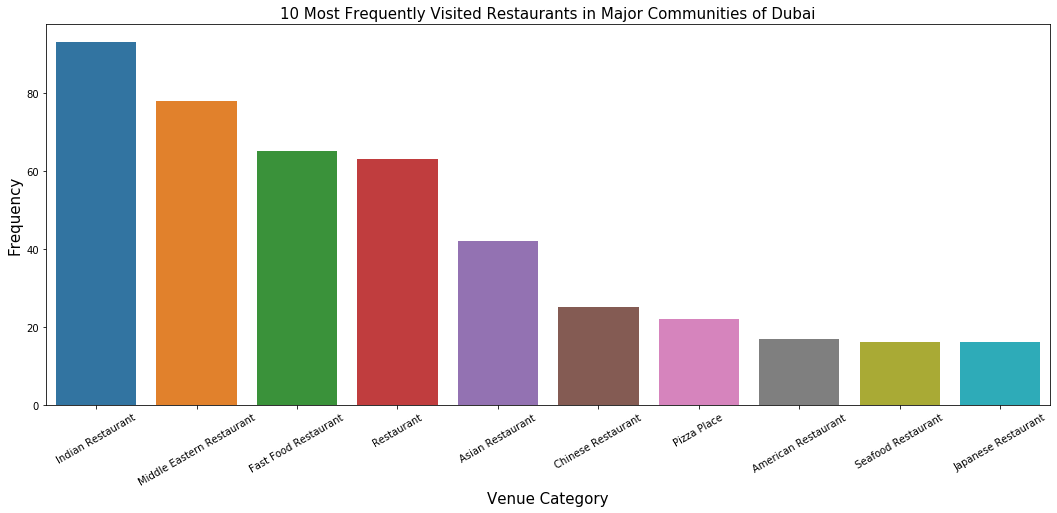

In [67]:
# create a bar chart for most visited restaurants in Dubai

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,7))

s=sns.barplot(x="Venue Category", y="Frequency", data=dubai_venues_restaurant_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Visited Restaurants in Major Communities of Dubai', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Restaurants.png", dpi=300)
plt.show()

# Indian resturants are most popular and visited by most people in top populated communities of Dubai.

# Analyze the Restaurants further

In [74]:
# group countries by continents and apply sum() function 

df_dubai_restaurants = dubai_venues_restaurant_top10.groupby('Venue Category', axis=0).sum()
df_dubai_restaurants.head()

,Frequency
Venue Category,
American Restaurant,17
Asian Restaurant,42
Chinese Restaurant,25
Fast Food Restaurant,65
Indian Restaurant,93


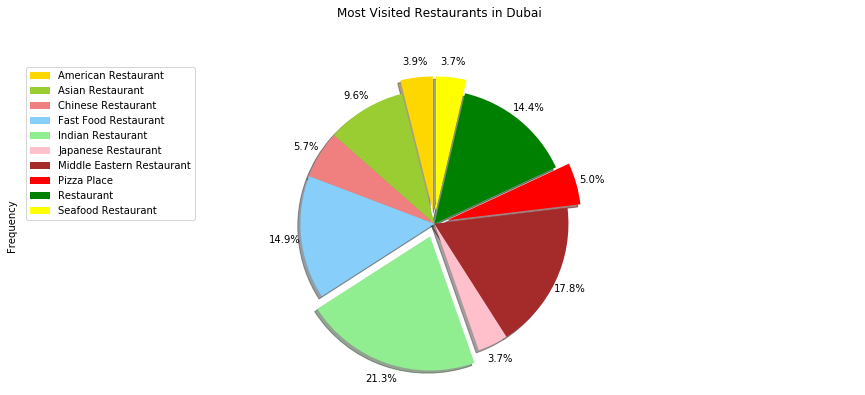

In [78]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'brown', 'red', 'green', 'yellow']
explode_list = [0.1, 0, 0, 0, 0.1, 0, 0, 0.1, 0, 0.1] # ratio for each continent with which to offset each wedge.

df_dubai_restaurants['Frequency'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Most Visited Restaurants in Dubai', y=1.12) 

plt.axis('equal') 
# add legend
plt.legend(df_dubai_restaurants.index, loc='upper left') 


plt.show()

# 21.3% of restaurants in Dubai are Indian Food restaurants, followed by Middle Eastern restaurants which are 17.8% of total restaurants in Dubai

# One Hot Encoding

In [106]:
# one hot encoding
dubai_onehot = pd.get_dummies(dubai_venues_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add community column back to dataframe
dubai_onehot['Community Name'] = dubai_venues_restaurant['Community Name'] 

# move community name column to the first column

fixed_columns = [dubai_onehot.columns[-1]] + list(dubai_onehot.columns[:-1])
dubai_onehot = dubai_onehot[fixed_columns]

dubai_onehot

,Community Name,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brazilian Restaurant,Burger Joint,Burrito Place,...,South Indian Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant
1,Al Quoz,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Al Quoz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Al Quoz,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Al Quoz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Al Quoz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Al Mankhool,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
667,Al Mankhool,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,Al Mankhool,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,Al Mankhool,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
dubai_onehot.shape

(670, 54)

# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [108]:
dubai_grouped = dubai_onehot.groupby('Community Name').mean().reset_index()
dubai_grouped

,Community Name,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Brazilian Restaurant,Burger Joint,Burrito Place,...,South Indian Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Yemeni Restaurant
0,Al Badaa,0.000000,0.000000,0.032258,0.064516,0.000000,0.000000,0.032258,0.064516,0.000000,...,0.000000,0.032258,0.000000,0.000000,0.000000,0.032258,0.000000,0.032258,0.032258,0.000000
1,Al Karama,0.000000,0.037736,0.037736,0.056604,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,0.018868,0.056604,0.000000
2,Al Mankhool,0.000000,0.019231,0.038462,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057692,0.000000
3,Al Muraqqabat,0.000000,0.025641,0.051282,0.051282,0.000000,0.025641,0.000000,0.025641,0.000000,...,0.000000,0.000000,0.025641,0.025641,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000
4,Al Murar,0.025000,0.025000,0.025000,0.075000,0.000000,0.000000,0.000000,0.025000,0.000000,...,0.000000,0.000000,0.000000,0.025000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000
5,Al Muteena,0.000000,0.021277,0.021277,0.106383,0.000000,0.021277,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Al Nahda 2,0.000000,0.000000,0.036364,0.036364,0.000000,0.018182,0.000000,0.018182,0.000000,...,0.018182,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.018182,0.000000
7,Al Quoz,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Al Quoz Third,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Al Qusais 1,0.000000,0.000000,0.000000,0.085106,0.000000,0.021277,0.000000,0.021277,0.000000,...,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000


In [109]:
dubai_grouped.shape

(18, 54)

In [110]:
num_top_venues = 5

for hood in dubai_grouped['Community Name']:
    print("++++"+hood+"++++")
    temp = dubai_grouped[dubai_grouped['Community Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

++++Al Badaa++++
                       venue  freq
0          French Restaurant  0.13
1  Middle Eastern Restaurant  0.10
2                 Restaurant  0.10
3           Asian Restaurant  0.06
4               Burger Joint  0.06


++++Al Karama++++
                  venue  freq
0     Indian Restaurant  0.23
1            Restaurant  0.08
2    Seafood Restaurant  0.08
3  Fast Food Restaurant  0.06
4      Asian Restaurant  0.06


++++Al Mankhool++++
                           venue  freq
0              Indian Restaurant  0.27
1             Seafood Restaurant  0.08
2               Asian Restaurant  0.08
3        North Indian Restaurant  0.08
4  Vegetarian / Vegan Restaurant  0.06


++++Al Muraqqabat++++
                       venue  freq
0  Middle Eastern Restaurant  0.18
1                 Restaurant  0.13
2          Indian Restaurant  0.08
3         Chinese Restaurant  0.05
4           Iraqi Restaurant  0.05


++++Al Murar++++
                       venue  freq
0                 Restaurant 

In [111]:
# Let's put that into a dataframe

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [113]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
community_venues_sorted = pd.DataFrame(columns=columns)
community_venues_sorted['Community Name'] = dubai_grouped['Community Name']

for ind in np.arange(dubai_grouped.shape[0]):
    community_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dubai_grouped.iloc[ind, :], num_top_venues)

community_venues_sorted.head()

,Community Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Badaa,French Restaurant,Middle Eastern Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Burger Joint,Gluten-free Restaurant,Indian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
1,Al Karama,Indian Restaurant,Restaurant,Seafood Restaurant,North Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant,Korean Restaurant,Dim Sum Restaurant,Middle Eastern Restaurant
2,Al Mankhool,Indian Restaurant,North Indian Restaurant,Asian Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,American Restaurant,Filipino Restaurant,Restaurant
3,Al Muraqqabat,Middle Eastern Restaurant,Restaurant,Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,American Restaurant,Chinese Restaurant,Iraqi Restaurant,Asian Restaurant,Pizza Place
4,Al Murar,Middle Eastern Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Asian Restaurant,Fried Chicken Joint,Indian Restaurant,Iraqi Restaurant,Pizza Place,African Restaurant


In [114]:
community_venues_sorted.shape

(18, 11)

# K-means Clustering

In [115]:
# set number of clusters
kclusters = 5

dubai_grouped_clustering = dubai_grouped.drop('Community Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dubai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 3, 3, 3, 1, 2, 4, 1], dtype=int32)

In [118]:
# add clustering labels
#community_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dubai_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dubai_merged = dubai_merged.join(community_venues_sorted.set_index('Community Name'), on='Community Name')

dubai_merged.head() # check the last columns!

,Community Name,Population (2018),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Al Quoz,158543,25.130830,55.232730,2,Italian Restaurant,French Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Australian Restaurant,Steakhouse,Fried Chicken Joint,Indonesian Restaurant
3,Warsan,97159,25.162687,55.422592,0,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Fried Chicken Joint,Thai Restaurant,Asian Restaurant,Pizza Place,Afghan Restaurant,Indian Restaurant
4,Hor Al Anz,81741,25.276680,55.335560,3,Middle Eastern Restaurant,Indian Restaurant,Fast Food Restaurant,Iraqi Restaurant,Restaurant,Moroccan Restaurant,Asian Restaurant,Pizza Place,Kebab Restaurant,African Restaurant
5,Al Karama,70558,25.248900,55.306100,1,Indian Restaurant,Restaurant,Seafood Restaurant,North Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant,Korean Restaurant,Dim Sum Restaurant,Middle Eastern Restaurant
8,Al Muraqqabat,68717,25.268040,55.324920,3,Middle Eastern Restaurant,Restaurant,Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,American Restaurant,Chinese Restaurant,Iraqi Restaurant,Asian Restaurant,Pizza Place


In [121]:
# create map
map_clusters = folium.Map(location=[dubai_latitude, dubai_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dubai_merged['Latitude'], dubai_merged['Longitude'], dubai_merged['Community Name'], dubai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

In [133]:
#cluster 0

dubai_cluster_0 = dubai_merged.loc[dubai_merged['Cluster Labels'] == 0, dubai_merged.columns[[1] + list(range(5, dubai_merged.shape[1]))]]

print("no of communities in cluster 0 is {}" .format(dubai_cluster_0.shape[0]))


dubai_cluster_0

no of communities in cluster 0 is 1
cluster 0


,Population (2018),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,97159,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Fried Chicken Joint,Thai Restaurant,Asian Restaurant,Pizza Place,Afghan Restaurant,Indian Restaurant


In [134]:
#cluster 1

dubai_cluster_1 = dubai_merged.loc[dubai_merged['Cluster Labels'] == 1, dubai_merged.columns[[1] + list(range(5, dubai_merged.shape[1]))]]

print("no of communities in cluster 1 is {}" .format(dubai_cluster_1.shape[0]))


dubai_cluster_1

no of communities in cluster 1 is 6


,Population (2018),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,70558,Indian Restaurant,Restaurant,Seafood Restaurant,North Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant,Korean Restaurant,Dim Sum Restaurant,Middle Eastern Restaurant
11,56489,Indian Restaurant,Fast Food Restaurant,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Fried Chicken Joint,American Restaurant,Asian Restaurant,Chinese Restaurant,Pizza Place
15,46929,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Asian Restaurant,Chinese Restaurant,Persian Restaurant,Dim Sum Restaurant,Seafood Restaurant,Restaurant,Japanese Restaurant
17,42904,Indian Restaurant,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Middle Eastern Restaurant,North Indian Restaurant,Seafood Restaurant,Indonesian Restaurant,French Restaurant,Filipino Restaurant
18,41818,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Fried Chicken Joint,Asian Restaurant,Pakistani Restaurant,South Indian Restaurant,Seafood Restaurant,BBQ Joint
23,37400,Indian Restaurant,North Indian Restaurant,Asian Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,American Restaurant,Filipino Restaurant,Restaurant


In [135]:
#cluster 2

dubai_cluster_2 = dubai_merged.loc[dubai_merged['Cluster Labels'] == 2, dubai_merged.columns[[1] + list(range(5, dubai_merged.shape[1]))]]

print("no of communities in cluster 2 is {}" .format(dubai_cluster_2.shape[0]))


dubai_cluster_2

no of communities in cluster 2 is 5


,Population (2018),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,158543,Italian Restaurant,French Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Australian Restaurant,Steakhouse,Fried Chicken Joint,Indonesian Restaurant
9,60288,Burger Joint,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Indian Restaurant,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Lebanese Restaurant,Seafood Restaurant
12,55052,Indian Restaurant,Burger Joint,Restaurant,Chinese Restaurant,Italian Restaurant,Pizza Place,Grilled Meat Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Cajun / Creole Restaurant
13,54338,French Restaurant,Middle Eastern Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Burger Joint,Gluten-free Restaurant,Indian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
19,41048,French Restaurant,Restaurant,Middle Eastern Restaurant,Indian Restaurant,Fast Food Restaurant,Steakhouse,Japanese Restaurant,Persian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant


In [136]:
#cluster 3

dubai_cluster_3 = dubai_merged.loc[dubai_merged['Cluster Labels'] == 3, dubai_merged.columns[[1] + list(range(5, dubai_merged.shape[1]))]]

print("no of communities in cluster 3 is {}" .format(dubai_cluster_3.shape[0]))


dubai_cluster_3

no of communities in cluster 3 is 5


,Population (2018),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,81741,Middle Eastern Restaurant,Indian Restaurant,Fast Food Restaurant,Iraqi Restaurant,Restaurant,Moroccan Restaurant,Asian Restaurant,Pizza Place,Kebab Restaurant,African Restaurant
8,68717,Middle Eastern Restaurant,Restaurant,Indian Restaurant,Japanese Restaurant,Fast Food Restaurant,American Restaurant,Chinese Restaurant,Iraqi Restaurant,Asian Restaurant,Pizza Place
14,48804,Restaurant,Middle Eastern Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Iraqi Restaurant,Persian Restaurant,Fried Chicken Joint,Pizza Place,Dim Sum Restaurant
16,43473,Restaurant,Middle Eastern Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,Indian Restaurant,Iraqi Restaurant,Pizza Place,Persian Restaurant,Syrian Restaurant
21,38294,Middle Eastern Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Asian Restaurant,Fried Chicken Joint,Indian Restaurant,Iraqi Restaurant,Pizza Place,African Restaurant


In [137]:
#cluster 4

dubai_cluster_4 = dubai_merged.loc[dubai_merged['Cluster Labels'] == 4, dubai_merged.columns[[1] + list(range(5, dubai_merged.shape[1]))]]

print("no of communities in cluster 4 is {}" .format(dubai_cluster_4.shape[0]))


dubai_cluster_4

no of communities in cluster 4 is 1


,Population (2018),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,40541,Fast Food Restaurant,Middle Eastern Restaurant,Indian Restaurant,Pakistani Restaurant,Mediterranean Restaurant,Asian Restaurant,Australian Restaurant,Lebanese Restaurant,Grilled Meat Restaurant,Greek Restaurant
